# 📊 Titanic Dataset Analysis
## Descriptive Statistics, Variance, Outliers, Missing Data, and Visualizations

### Exercise 1: Load and Inspect the Dataset
- Load the Titanic dataset (`titanic.csv`) using pandas.
- Display first rows and info to understand column types.

In [120]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [40]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Shape:", titanic_df.shape)


Dataset Shape: (891, 12)


In [5]:
print("\nDataset Info:")
print(titanic_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print("\nFirst few rows:")
# print(titanic_df.head())
titanic_df.head()


First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# print("\n" + "="*80)
# print("DATA TYPE CLASSIFICATION")
# print("="*80)

### Exercise 2: Classify Data Types
- Classify each column as **categorical, ordinal, numerical**.
- For numerical: specify **discrete/continuous** and **interval/ratio**.

In [23]:
# Data type classification for each column
data_types = {
    'PassengerId':     ['Numerical', 'Discrete', 'Ratio', 'Unique identifier - discrete integers with meaningful order but arbitrary zero point'],
    'Survived':        ['Categorical', 'Binary', None, 'Binary outcome variable (0 = Did not survive, 1 = Survived)'],
    'Pclass':          ['Ordinal', None, None, 'Passenger class with clear ranking (1st > 2nd > 3rd class)'],
    'Name':            ['Categorical', 'Nominal', None, 'Text identifier - no inherent ordering or numerical meaning'],
    'Sex':             ['Categorical', 'Nominal (Binary)', None, 'Gender categories with no inherent ordering'],
    'Age':             ['Numerical', 'Continuous', 'Ratio', 'Age in years - continuous measurement with meaningful zero point'],
    'SibSp':           ['Numerical', 'Discrete', 'Ratio', 'Count of siblings/spouses - discrete whole numbers with meaningful zero'],
    'Parch':           ['Numerical', 'Discrete', 'Ratio', 'Count of parents/children - discrete whole numbers with meaningful zero'],
    'Ticket':          ['Categorical', 'Nominal', None, 'Ticket identifier - mixed alphanumeric codes with no inherent ordering'],
    'Fare':            ['Numerical', 'Continuous', 'Ratio', 'Ticket fare in currency - continuous measurement with meaningful zero point'],
    'Cabin':           ['Categorical', 'Nominal', None, 'Cabin identifier - alphanumeric codes with no inherent ordering'],
    'Embarked':        ['Categorical', 'Nominal', None, 'Port of embarkation (C, Q, S) - no inherent ordering between ports']
}

In [24]:
# Create a DataFrame from the dictionary
classification_df = pd.DataFrame.from_dict(
    data_types, 
    orient='index', 
    columns=['Type', 'Subtype', 'Scale', 'Explanation']
)

# Display the classification
classification_df

,Type,Subtype,Scale,Explanation
PassengerId,Numerical,Discrete,Ratio,Unique identifier - discrete integers with mea...
Survived,Categorical,Binary,None,"Binary outcome variable (0 = Did not survive, ..."
Pclass,Ordinal,None,None,Passenger class with clear ranking (1st > 2nd ...
Name,Categorical,Nominal,None,Text identifier - no inherent ordering or nume...
Sex,Categorical,Nominal (Binary),None,Gender categories with no inherent ordering
Age,Numerical,Continuous,Ratio,Age in years - continuous measurement with mea...
SibSp,Numerical,Discrete,Ratio,Count of siblings/spouses - discrete whole num...
Parch,Numerical,Discrete,Ratio,Count of parents/children - discrete whole num...
Ticket,Categorical,Nominal,None,Ticket identifier - mixed alphanumeric codes w...
Fare,Numerical,Continuous,Ratio,Ticket fare in currency - continuous measureme...


In [25]:
print("""
1. CATEGORICAL vs NUMERICAL:
   - Categorical: Represents categories/groups (Sex, Embarked, Name, Ticket, Cabin)
   - Numerical: Represents quantities that can be measured (Age, Fare, SibSp, Parch)

2. ORDINAL vs NOMINAL (for categorical):
   - Ordinal: Has meaningful order (Pclass: 1st > 2nd > 3rd)
   - Nominal: No inherent order (Sex, Embarked, Name, etc.)

3. DISCRETE vs CONTINUOUS (for numerical):
   - Discrete: Countable values, usually integers (SibSp, Parch, PassengerId)
   - Continuous: Can take any value within a range (Age, Fare)

4. INTERVAL vs RATIO (for numerical):
   - Interval: No meaningful zero point (PassengerId - arbitrary starting point)
   - Ratio: Meaningful zero point (Age, Fare, SibSp, Parch - zero means absence)

Special Cases:
- PassengerId: Though numerical, it's really an identifier (could be treated as categorical)
- Survived: Binary categorical variable (could be coded as 0/1 but represents categories)
- Pclass: Clearly ordinal despite being coded as numbers
""")


1. CATEGORICAL vs NUMERICAL:
   - Categorical: Represents categories/groups (Sex, Embarked, Name, Ticket, Cabin)
   - Numerical: Represents quantities that can be measured (Age, Fare, SibSp, Parch)

2. ORDINAL vs NOMINAL (for categorical):
   - Ordinal: Has meaningful order (Pclass: 1st > 2nd > 3rd)
   - Nominal: No inherent order (Sex, Embarked, Name, etc.)

3. DISCRETE vs CONTINUOUS (for numerical):
   - Discrete: Countable values, usually integers (SibSp, Parch, PassengerId)
   - Continuous: Can take any value within a range (Age, Fare)

4. INTERVAL vs RATIO (for numerical):
   - Interval: No meaningful zero point (PassengerId - arbitrary starting point)
   - Ratio: Meaningful zero point (Age, Fare, SibSp, Parch - zero means absence)

Special Cases:
- PassengerId: Though numerical, it's really an identifier (could be treated as categorical)
- Survived: Binary categorical variable (could be coded as 0/1 but represents categories)
- Pclass: Clearly ordinal despite being coded as numb

### Exercise 3: Descriptive Statistics
- Compute **mean, median, mode, range, IQR, SD** for Age and Fare.
- Compute **population vs sample variance** for Fare and interpret Bessel's correction.
- Draft a first analysis of the dataset based on those metrics.

In [36]:
# Function to compute descriptive statistics
def descriptive_stats(series):
    stats_dict = {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else None,
        'Range': series.max() - series.min(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Standard Deviation': series.std(),  # Sample SD by default (ddof=1)
        'Sample Variance': series.var(ddof=1),
        'Population Variance': series.var(ddof=0)
    }
    return pd.Series(stats_dict)


In [37]:
# Drop NA values for numerical analysis
age = titanic_df['Age'].dropna()
print(f'Count of Null variabels: {len(titanic_df["Age"])-len(age)}')
fare = titanic_df['Fare'].dropna()
print(f'Count of Null variabels: {len(titanic_df["Fare"])-len(age)}')

# Compute stats for Age and Fare
age_stats = descriptive_stats(age)
fare_stats = descriptive_stats(fare)

# Combine into one DataFrame
desc_stats_df = pd.DataFrame({
    'Age': age_stats,
    'Fare': fare_stats
})

desc_stats_df


Count of Null variabels: 177
Count of Null variabels: 177


,Age,Fare
Mean,29.699118,32.204208
Median,28.000000,14.454200
Mode,24.000000,8.050000
Range,79.580000,512.329200
IQR,17.875000,23.089600
Standard Deviation,14.526497,49.693429
Sample Variance,211.019125,2469.436846
Population Variance,210.723580,2466.665312


### Exercise 4: Visualize Distributions & Outliers
- Create **histograms** for Age and Fare.
- Create **boxplots** to detect outliers visually.

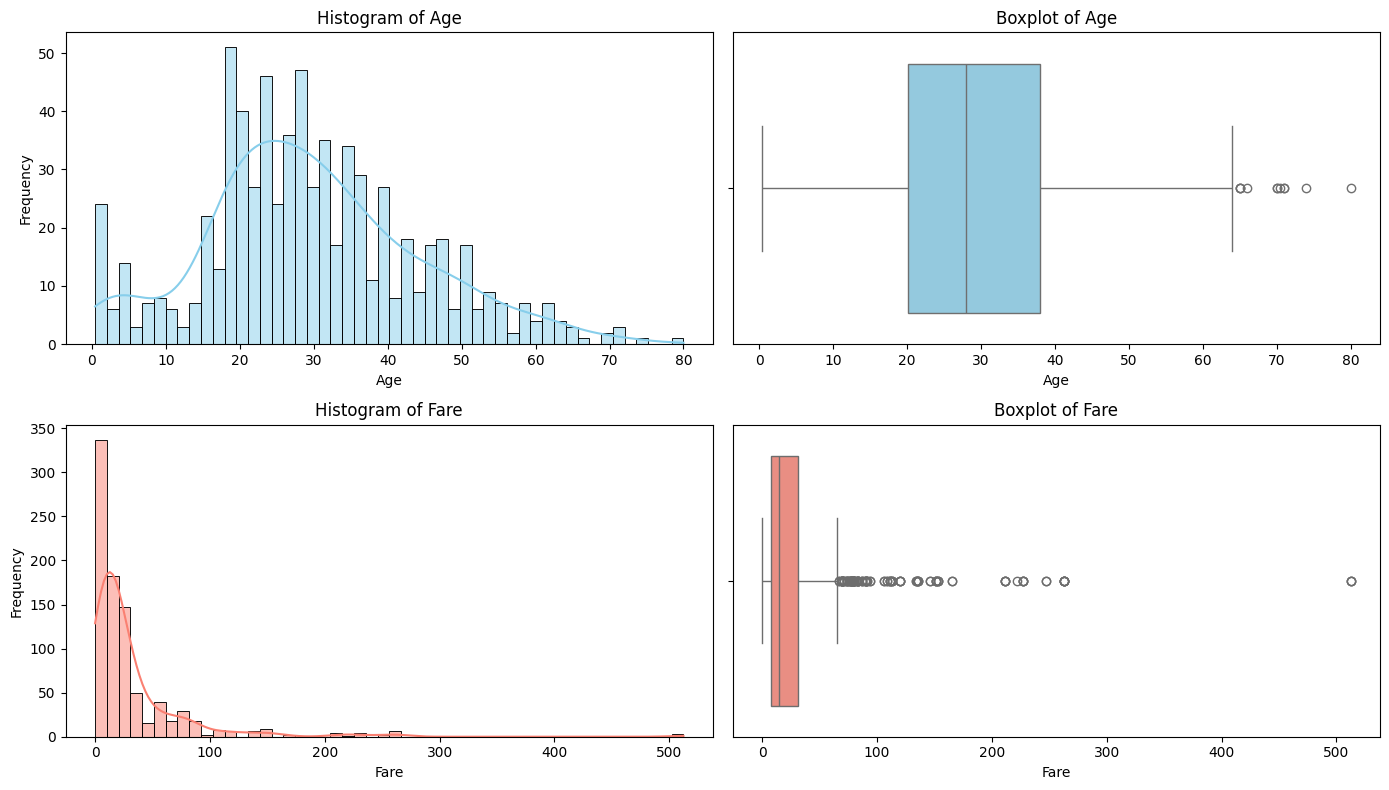

In [54]:
# Set up the figure for subplots (2 rows, 2 columns)
plt.figure(figsize=(14, 8))

# Histogram for Age
plt.subplot(2, 2, 1)
sns.histplot(age, kde=True, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot for Age
plt.subplot(2, 2, 2)
sns.boxplot(x=age, color='skyblue')
plt.title('Boxplot of Age')
plt.xlabel('Age')

########################################################################################

# Histogram for Fare
plt.subplot(2, 2, 3)
sns.histplot(fare, kde=True, bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Boxplot for Fare
plt.subplot(2, 2, 4)
sns.boxplot(x=fare, color='salmon')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Exercise 5: Outlier Detection
- Identify outliers using **IQR** and **Z-score** for Age and Fare and compare both approaches.
- Interpret them in context.

In [76]:
# Outlier Detection using IQR for Age and Fare

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f'lower_bound = {lower_bound}')
    print(f'upper_bound = {upper_bound}')
    print(f'outliers =\n {outliers}')
    # return outliers



# Outlier Detection using Z-score for Age and Fare

def detect_outliers_zscore(series, threshold=3):
    z_scores = (series - series.mean()) / series.std() # Standard Deviation
    outliers = series[abs(z_scores) > threshold]
 
    return outliers

In [77]:
# Detecting outliers in Age and Fare using IQR
age_outliers_iqr = detect_outliers_iqr(age)
fare_outliers_iqr = detect_outliers_iqr(fare)




# Detecting outliers in Age and Fare using Z-score
age_outliers_zscore = detect_outliers_zscore(age)
fare_outliers_zscore = detect_outliers_zscore(fare)

# Print results for comparison
print(f'Age Outlier IQR =\n{age_outliers_iqr}\n')
print(f'Age Outlier Z-score =\n{age_outliers_zscore}\n')
print(f'Fare Outlier IQR =\n{fare_outliers_iqr}\n')
print(f'Fare Outlier Z-score =\n{fare_outliers_zscore}\n')

lower_bound = -6.6875
upper_bound = 64.8125
outliers =
 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
lower_bound = -26.724
upper_bound = 65.6344
outliers =
 1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64
Age Outlier IQR =
None

Age Outlier Z-score =
630    80.0
851    74.0
Name: Age, dtype: float64

Fare Outlier IQR =
None

Fare Outlier Z-score =
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64



In [80]:
Q1 = titanic_df["Age"].quantile(0.25)
Q3 = titanic_df["Age"].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print("IQR for Age:", IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = titanic_df["Age"][(titanic_df["Age"] < lower_bound) | (titanic_df["Age"] > upper_bound)]
print(f'lower_bound = {lower_bound}')
print(f'upper_bound = {upper_bound}')
print(f'outliers =\n {outliers}')
print('***************************')
z_scores = (titanic_df["Age"] - titanic_df["Age"].mean()) / titanic_df["Age"].std() # Standard Deviation
outliers = titanic_df["Age"][abs(z_scores) > 3]
print(z_scores)

20.125 38.0
IQR for Age: 17.875
lower_bound = -6.6875
upper_bound = 64.8125
outliers =
 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
***************************
0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: Age, Length: 891, dtype: float64


### Exercise 6: Missing Data Handling
- Identify missing values.
- Impute Age (median), and classify missingness type (MCAR, MAR, MNAR).
- Drop rows with missing Embarked.

In [ ]:
display(titanic_df)
# Identify Missing Values
missing_data = titanic_df.isnull().sum()
missing_percentage = (titanic_df.isnull().mean() * 100)

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})
print("\n" + "="*80)
print("Missing Values Summary")
print("="*80)
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]  # Filter to show only columns with missing data
print(missing_summary)

# Impute Age (Median)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

print("\n" + "="*80)
print("Check for Missingness Type")
print("="*80)
# Check for Missingness Type
missing_age_data = titanic_df[titanic_df['Age'].isnull()]
print("Missing Age Data - Pclass distribution:\n", missing_age_data['Pclass'].value_counts())
print("Missing Age Data - Survived distribution:\n", missing_age_data['Survived'].value_counts())

# Drop Rows with Missing 'Embarked'
titanic_df = titanic_df.dropna(subset=['Embarked'])

print("\n" + "="*80)
print("The Cleaned Dataframe")
print("="*80)
# Display the cleaned dataframe
display(titanic_df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



Missing Values Summary
       Missing Count  Missing Percentage
Cabin            687            77.27784

Check for Missingness Type
Missing Age Data - Pclass distribution:
 Series([], Name: count, dtype: int64)
Missing Age Data - Survived distribution:
 Series([], Name: count, dtype: int64)

The Cleaned Dataframe


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exercise 7: Z-Score Interpretation
- Pick two passengers and compare their Age Z-scores.
- Who is older relative to the population?

In [111]:
# Pick 2 random passengers
sampled_passengers = titanic_df.sample(n=2, random_state=42)  # random_state for reproducibility
display(sampled_passengers)

z_scores = (sampled_passengers['Age'] - titanic_df['Age'].mean()) / titanic_df['Age'].std()
display(z_scores)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


281   -0.101283
435   -1.179456
Name: Age, dtype: float64

In [117]:
# 1. Drop missing Age values (otherwise z-score can't be computed)
titanic_df = titanic_df.dropna(subset=["Age"])

# 2. Compute z-scores for Age
titanic_df["Age_Z"] = stats.zscore(titanic_df["Age"])

# 3. Pick 2 random passengers
two_passengers = titanic_df.sample(n=2, random_state=42)

# 4. Display their ages and z-scores
display(two_passengers[["Name", "Age", "Age_Z"]])

# 5. Compare who is relatively older
p1, p2 = two_passengers.iloc[0], two_passengers.iloc[1]
p1_lastName = p1['Name'].split(",")[1].strip()
p2_lastName = p2['Name'].split(",")[1].strip()
if p1["Age_Z"] > p2["Age_Z"]:
    print(f'{p1_lastName} is older relative to the population.')
else:
    print(f'{p2_lastName} is older relative to the population.')

,Name,Age,Age_Z
281,"Olsson, Mr. Nils Johan Goransson",28.0,-0.10134
435,"Carter, Miss. Lucile Polk",14.0,-1.18012


Mr. Nils Johan Goransson is older relative to the population.


### Exercise 8: Multivariate Visualization (Optional)
- Scatter plot: Age vs Fare colored by Survived.

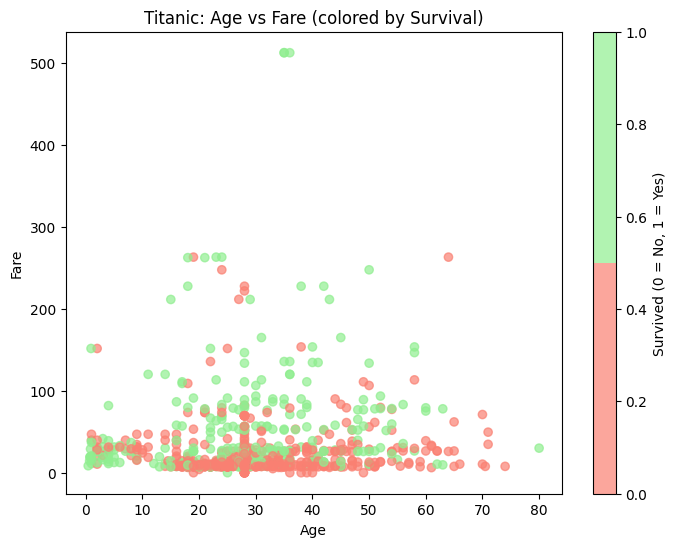

In [ ]:
# With matplotlib.pyplot:
## from matplotlib.colors import ListedColormap


# Drop rows with missing Age or Fare
plot_df = titanic_df.dropna(subset=["Age", "Fare"])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    plot_df["Age"], 
    plot_df["Fare"], 
    c=plot_df["Survived"],  # color by survival
    cmap=ListedColormap(["salmon", "lightgreen"]),  # 0=red, 1=green
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Titanic: Age vs Fare (colored by Survival)")
plt.colorbar(scatter, label="Survived (0 = No, 1 = Yes)")
plt.show()

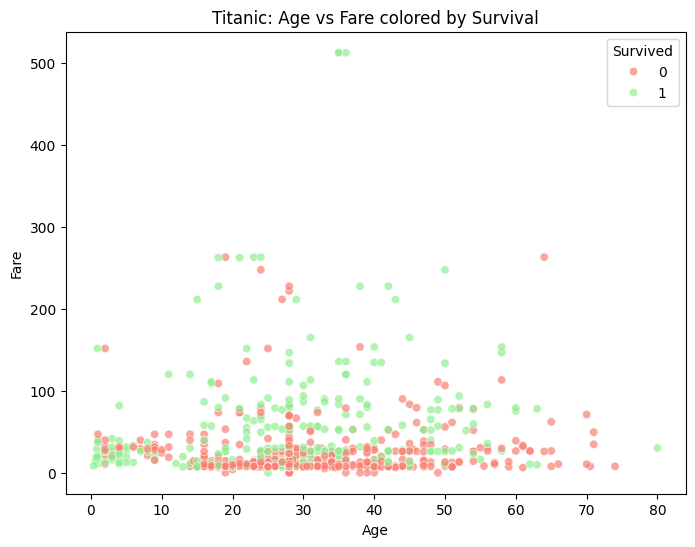

Number of passengers who paid less than 100 and died: 535


In [ ]:
# With matplotlib.pyplot and seaborn:
## import seaborn as sns
## import matplotlib.pyplot as plt

plot_df = titanic_df.dropna(subset=["Age", "Fare"])

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x="Age", 
    y="Fare", 
    hue="Survived",
    palette={0: "salmon", 1: "lightgreen"},  # 0=red, 1=green
    alpha=0.7
)

plt.title("Titanic: Age vs Fare colored by Survival")
plt.show()

In [143]:
# Filter passengers who paid less than 100 and did not survive
print("\n" + "="*80)
print("Apply Some Filter")
print("="*80)
count_died = titanic_df[(titanic_df["Fare"] < 100) & (titanic_df["Survived"] == 0)].shape[0]
print(f"Number of passengers who paid less than 100 and died: {count_died}")

count_not_mature = titanic_df[(titanic_df["Fare"] < 100) & (titanic_df["Survived"] == 0) & (titanic_df["Age"] < 18)].shape[0]
print(f"Number of passengers who paid less than 100 and were not mature and died: {count_not_mature}")

max_age = titanic_df["Age"].max()
count_oldest = titanic_df[(titanic_df["Age"] == max_age)].shape[0]
print(f'The oldest passenger was {max_age} years old and there are {count_oldest} persons.')
count_oldest_died = titanic_df[(titanic_df["Survived"] == 0) & (titanic_df["Age"] == max_age)].shape[0]
print(f"Number of passengers who were the oldest and died: {count_oldest_died}")

min_age = titanic_df["Age"].min()
count_youngest = titanic_df[(titanic_df["Age"] == min_age)].shape[0]
print(f'The oldest passenger was {min_age} years old and there are {count_youngest} persons.')
display(titanic_df[(titanic_df["Age"] == min_age)])




Apply Some Filter
Number of passengers who paid less than 100 and died: 535
Number of passengers who paid less than 100 and were not mature and died: 51
The oldest passenger was 80.0 years old and there are 1 persons.
Number of passengers who were the oldest and died: 0
The oldest passenger was 0.42 years old and there are 1 persons.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Z
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,-2.226536


### Exercise 9: Peculiar implementations (Optional)
- This part focuses on a funny quirk. Check this code snippet out. What could be happening here?

In [ ]:
data = [1, 2, 3, 4, 5]

numpy_std = np.std(data)  
pandas_std = pd.Series(data).std()  

print("NumPy std:", numpy_std)
print("Pandas std:", pandas_std)

NumPy std: 1.4142135623730951
Pandas std: 1.5811388300841898


## 2️⃣ What happens

* **NumPy (np.std)** by default **computes the population standard deviation**:

$$\sigma = \sqrt{\frac{1}{N} \sum (x_i - \bar{x})^2}$$

* **Pandas (.std())** by default **computes the sample standard deviation**:

$$s = \sqrt{\frac{1}{N-1} \sum (x_i - \bar{x})^2}$$

Notice the difference: **NumPy divides by N**, Pandas divides by **N-1**.

* N = 5 here. So Pandas divides by 4, NumPy divides by 5 → Pandas std is slightly **larger**.

## 3️⃣ Example with your data

* Data: [1, 2, 3, 4, 5]
* Mean = 3
* Squared deviations: [4, 1, 0, 1, 4] → sum = 10
* **NumPy std**: $\sqrt{10 / 5} = \sqrt{2} \approx 1.4142$
* **Pandas std**: $\sqrt{10 / 4} = \sqrt{2.5} \approx 1.5811$

## 4️⃣ How to make them match

* **NumPy sample std**: `np.std(data, ddof=1)` → ddof=1 uses N-1
* **Pandas population std**: `pd.Series(data).std(ddof=0)` → divide by N


```
np_std_sample = np.std(data, ddof=1)  # matches Pandas default
pd_std_pop = pd.Series(data).std(ddof=0)  # matches NumPy default
```

## ✅ Takeaway

* **NumPy** = population std by default (ddof=0)
* **Pandas** = sample std by default (ddof=1)
* This small quirk often surprises beginners when they compare the two.

In [155]:
data = [1, 2, 3, 4, 5]

numpy_std = np.std(data)  
np_std_sample = np.std(data, ddof=1)  # matches Pandas default

pandas_std = pd.Series(data).std()  
pd_std_pop = pd.Series(data).std(ddof=0)  # matches NumPy default

print("NumPy std:", numpy_std)
print("Pandas std pop:", pd_std_pop)

print('************************************')

print("NumPy std sample:", np_std_sample)
print("Pandas std:", pandas_std)


NumPy std: 1.4142135623730951
Pandas std pop: 1.4142135623730951
************************************
NumPy std sample: 1.5811388300841898
Pandas std: 1.5811388300841898
